# Implementation of Arima Model

## Imports

In [47]:
import pandas as pd
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

## Data Import and Formatting

First we load in our dataset from a csv file. For now, we will use univariate data for ARIMA (just soybean futures prices).

<Axes: xlabel='Date'>

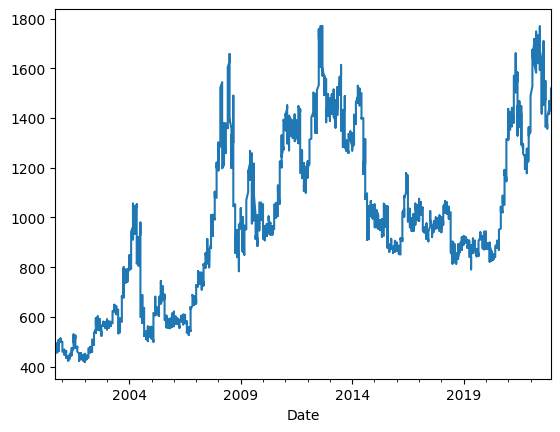

In [48]:
raw_data = pd.read_csv("DATA/yahoo_finance_futures/yf_futures.csv").set_index("Date")
raw_data.index = pd.to_datetime(raw_data.index)

soybean_futures = raw_data["Soybean"]

soybean_futures.dropna(inplace=True)

soybean_futures.index = soybean_futures.index.to_period('M')

#plot our data
soybean_futures.plot()

Let's calculate autoregression and look at an autoregression plot to estimate optimal values of p.

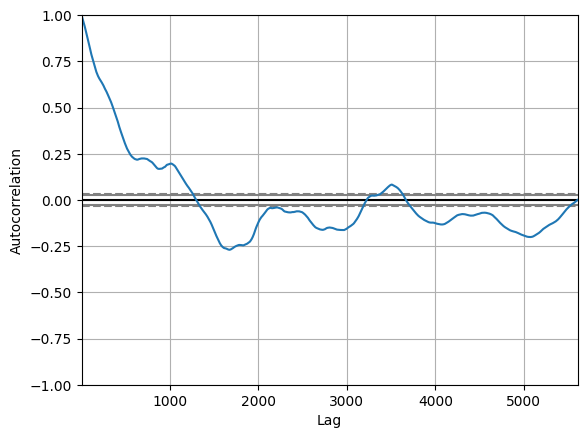

In [49]:
autocorrelation = [soybean_futures.autocorr(x) for x in range(5500)]

ac_plot = autocorrelation_plot(soybean_futures)

# lags = ac_plot.lines[-1].get_xdata()
# autocorrs = ac_plot.lines[-1].get_ydata()


Let us finally perform a train/test split.

In [50]:
train, test = train_test_split(soybean_futures, test_size=0.2, shuffle=False)

## Model Implementation, Testing, and Evaluation

Below, we iterate through every test timestep, and for each timestep use all previous data to build and fit an ARIMA model. Then we log all the predictions, and compare it to the true values.

Starting 100 predictions


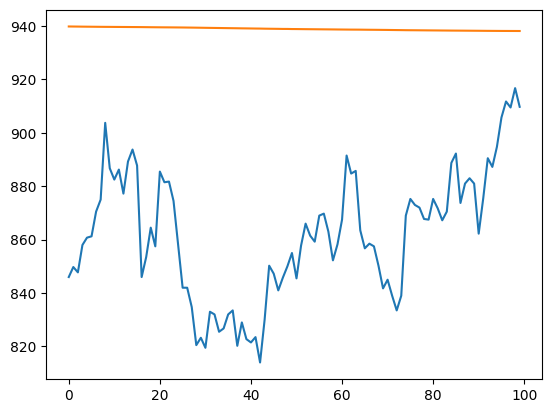

In [57]:
pred = []
history = list(train)

test = test[0:100]

print("Starting {lent} predictions".format(lent=(len(test))))

for ts in range(len(test)):
    print("Fitting and testing on {ts}".format(ts=ts), end='\r')
    model = ARIMA(history, order=(5, 2, 2))
    model_fit = model.fit()
    output = model_fit.forecast()[0]
    pred.append(output)
    history.append(test[ts])

plt.plot(list(test))
plt.plot(pred)
plt.show()



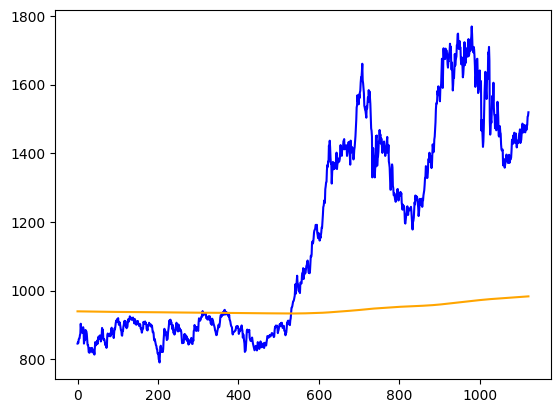

In [55]:
plt.plot(list(test), color="blue")
plt.plot(pred, color="orange")
plt.show()